In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [209]:
df = pd.read_csv("data/boligsiden_3.csv")

df.drop("Unnamed: 0", axis = 1, inplace = True)

#df.drop("Unnamed: 0.1", axis = 1, inplace = True)



In [210]:
df

,addressType,caseUrl,daysOnMarket,lotArea,monthlyExpense,perAreaPrice,priceCash,priceChangePercentage,housingArea,numberOfFloors,...,energyLabel,basementArea,numberOfBuildings,zipCode,municipality,municipalityCode,latitude,longitude,basement,lot
0,full year plot,http://www.nybolig.dk/maegler/pages/property-p...,0,135.0,14,5556.0,750000,0.00,NaN,NaN,...,NaN,0.0,1,5500,Middelfart,410,55.543777,9.766696,0,1
1,holiday house,https://www.mikkelsentoftlund.dk/redirect/?cas...,0,733.0,1790,20335.0,1395000,0.00,67.0,1.0,...,NaN,0.0,2,6100,Haderslev,510,55.197132,9.603360,0,1
2,villa,https://www.maegleren.dk/sag.aspx?mgl=2563&sag...,0,3700.0,1457,3662.0,745000,0.00,203.0,2.0,...,d,0.0,2,9640,Vesthimmerlands,820,56.833515,9.288974,0,1
3,holiday house,http://www.nybolig.dk/maegler/pages/property-p...,0,1307.0,2289,19027.0,1545000,0.00,78.0,1.0,...,NaN,0.0,1,6960,Ringkøbing-Skjern,760,55.866306,8.176336,0,1
4,villa,https://www.danbolig.dk?propertyid=2910000159&...,0,8447.0,2610,14407.0,2295000,0.00,152.0,1.0,...,d,0.0,2,4690,Faxe,320,55.333633,12.050508,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,villa,https://home.dk/sag/8060000791,46,800.0,2008,21733.0,2195000,0.00,97.0,1.0,...,c,0.0,2,9200,Aalborg,851,57.008976,9.818135,0,1
9996,condo,http://www.estate-maeglerne.dk/maegler/pages/p...,46,0.0,2871,27438.0,2195000,-4.36,80.0,3.0,...,d,0.0,6,2600,Glostrup,161,55.659950,12.405232,0,0
9997,villa,https://home.dk/sag/2220001724,46,3198.0,5597,29407.0,9000000,0.00,263.0,1.0,...,NaN,0.0,3,2635,Ishøj,183,55.624610,12.307359,0,1
9998,farm,https://home.dk/sag/9160001106,46,33650.0,2862,7847.0,2495000,0.00,158.0,3.0,...,c,8.0,9,5772,Faaborg-Midtfyn,430,55.163677,10.550933,1,1


In [211]:
addresses = df.addressType.unique().tolist()

In [212]:
np.sort(df.energyLabel.unique().tolist())

array(['a', 'a1', 'a2', 'a2010', 'a2015', 'a2020', 'b', 'c', 'd', 'e',
       'f', 'g', 'nan'], dtype='<U32')

In [213]:
df['energyLabel'].isnull().sum()

1299

In [214]:
# This cell generates the list addresses_list, that sorts the address types by their respective number of observations
# That list is then used to plot the histograms - on top of each other -


sums = []
for element in df.addressType.unique():
    sums.append(sum(df.addressType == element))

sums

addresses_list = [x for _, x in sorted(zip(sums, addresses))]

print(addresses_list)

addresses_list = addresses_list[::-1]

addresses_list

['villa apartment', 'holiday plot', 'hobby farm', 'full year plot', 'cooperative', 'farm', 'terraced house', 'holiday house', 'condo', 'villa']


['villa',
 'condo',
 'holiday house',
 'terraced house',
 'farm',
 'cooperative',
 'full year plot',
 'hobby farm',
 'holiday plot',
 'villa apartment']

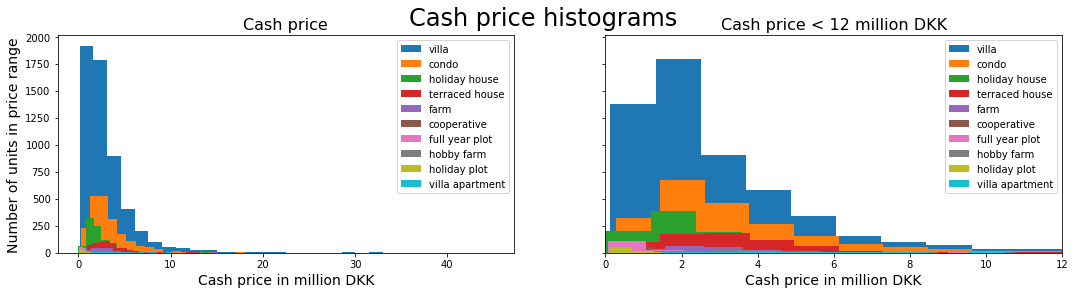

In [215]:
f, ax = plt.subplots(1,2, sharey = True, figsize = (18,4))

f.suptitle("Cash price histograms", size = 24)

for element in addresses_list:
    ax[0].hist(df["priceCash"][df.addressType == element]/1000000, bins = 30, label = element)
ax[0].set_xlabel("Cash price in million DKK", size = 14)
ax[0].legend()
ax[0].set_title("Cash price", size = 16)
ax[0].set_ylabel("Number of units in price range", size = 14)


for element in addresses_list:
    ax[1].hist(df["priceCash"][(df.addressType == element) & (df.priceCash < 12000000)]/1000000, bins = 10, label = element)
ax[1].set_xlabel("Cash price in million DKK", size = 14)
ax[1].set_xlim(0,12)
ax[1].set_title("Cash price < 12 million DKK", size = 16)
ax[1].legend()
#f.savefig("figures/hist_cash_price.png")

In [217]:
#df.describe([df])

In [218]:
X_simple_all = pd.read_csv("data/X_all_dummies.csv")

In [219]:
X_simple_all.drop("Unnamed: 0", axis = 1, inplace = True)

In [220]:
#X_simple_all

In [221]:
X_simple_all.describe()

,daysOnMarket,lotArea,monthlyExpense,housingArea,numberOfFloors,numberOfRooms,yearBuilt,basementArea,condo,cooperative,...,Tårnby,Tønder,Vallensbæk,Varde,Vejen,Vejle,Vesthimmerlands,Viborg,Vordingborg,Ærø
count,8672.000000,8672.000000,8672.000000,8672.000000,8672.000000,8672.000000,8672.000000,8672.000000,8672.000000,8672.000000,...,8672.000000,8672.000000,8672.000000,8672.000000,8672.000000,8672.000000,8672.000000,8672.000000,8672.000000,8672.000000
mean,21.750461,3623.166052,2825.183464,133.845018,1.688653,4.353782,1949.749193,14.974400,0.233510,0.017297,...,0.007957,0.005996,0.002652,0.009571,0.008879,0.017758,0.007611,0.015798,0.008879,0.002191
std,14.293390,19374.644536,1531.237554,58.012885,1.141846,1.684099,57.252042,37.122762,0.423088,0.130383,...,0.088850,0.077208,0.051434,0.097368,0.093815,0.132079,0.086912,0.124700,0.093815,0.046759
min,0.000000,0.000000,399.000000,5.000000,1.000000,1.000000,1200.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,116.750000,1863.000000,95.000000,1.000000,3.000000,1927.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,21.000000,735.000000,2449.500000,128.000000,1.000000,4.000000,1962.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1001.000000,3378.250000,163.000000,2.000000,5.000000,1976.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,46.000000,522015.000000,26954.000000,1071.000000,30.000000,23.000000,2025.000000,1172.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


'ax[0].legend()\nax[0].set_title("Cash price", size = 16)\nax[0].set_ylabel("Number of units in price range", size = 14)'

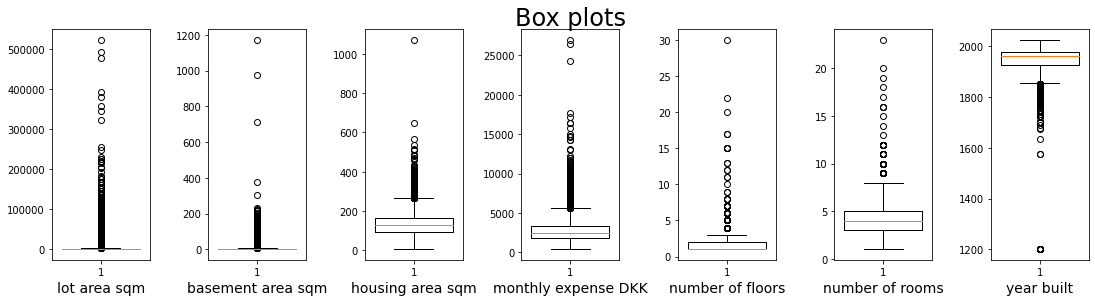

In [223]:
variables = ['lotArea',
             'basementArea',
             'housingArea',
             'monthlyExpense',
             'numberOfFloors',
             'numberOfRooms',
             'yearBuilt']
variables2 = ['lot area sqm',
             'basement area sqm',
             'housing area sqm',
             'monthly expense DKK',
             'number of floors',
             'number of rooms',
             'year built']


f, ax = plt.subplots(1,len(variables), figsize = (18,4))
f.suptitle("Box plots", size = 24)
i = 0
for var in variables:
    ax[i].boxplot(X_simple_all[var], widths = 0.8)
    ax[i].set_xlabel(variables2[i], size = 14)
    i = i + 1
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.6, 
                    hspace=0.4)
"""ax[0].legend()
ax[0].set_title("Cash price", size = 16)
ax[0].set_ylabel("Number of units in price range", size = 14)"""
#for var in variables:
#f.savefig("figures/boxplots_7.png")

In [225]:
X_simple_all.iloc[:,19:31].columns

Index(['a', 'a1', 'a2', 'a2010', 'a2015', 'a2020', 'b', 'c', 'd', 'e', 'f',
       'g'],
      dtype='object')

In [240]:
l1 = []
l2 = []
for i in range(0,31-19,1):
    print(X_simple_all.iloc[:,19:31].columns[i], sum(X_simple_all.iloc[:,19:31].iloc[:,i]))
    l1.append(X_simple_all.iloc[:,19:31].columns[i])
    l2.append(sum(X_simple_all.iloc[:,19:31].iloc[:,i]))
my_df = pd.DataFrame(list(zip(l1, l2)),
              columns=['energy label','number of observations'])
df_energy_obs = my_df.set_index('energy label')

df_energy_obs

a 1
a1 1
a2 5
a2010 271
a2015 301
a2020 137
b 626
c 2872
d 2694
e 991
f 523
g 250


,number of observations
energy label,
a,1
a1,1
a2,5
a2010,271
a2015,301
a2020,137
b,626
c,2872
d,2694


In [237]:
l1 = []
l2 = []
for i in range(0,X_simple_all.shape[1]-31,1):
    #print(X_simple_all.iloc[:,31:].columns[i], sum(X_simple_all.iloc[:,31:].iloc[:,i]))
    l1.append(X_simple_all.iloc[:,31:].columns[i])
    l2.append(sum(X_simple_all.iloc[:,31:].iloc[:,i]))

In [239]:
my_df = pd.DataFrame(list(zip(l1, l2)),
              columns=['municipality','number of observations'])
df_municipality_obs = my_df.set_index('municipality')

df_municipality_obs

,number of observations
municipality,
Aabenraa,59
Aalborg,313
Aarhus,508
Albertslund,16
Allerød,25
...,...
Vejle,154
Vesthimmerlands,66
Viborg,137
